C:\Users\Mohammad\AppData\Local\Temp\ipykernel_18548\3320212368.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speaker_df['Token Size'] = token_sizes
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_18548\3320212368.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speaker_df['Repetitions'] = repetitions
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_18548\3320212368.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Chandler ----> 	 {'Vocabulary Size': 2558, 'Total Tokens': 9531, 'Total Repetitions': 594, 'Confirmation Tokens': 11, 'Negation Tokens': 110}
Joey ----> 	 {'Vocabulary Size': 2642, 'Total Tokens': 9940, 'Total Repetitions': 530, 'Confirmation Tokens': 9, 'Negation Tokens': 109}
Rachel ----> 	 {'Vocabulary Size': 2374, 'Total Tokens': 9750, 'Total Repetitions': 615, 'Confirmation Tokens': 14, 'Negation Tokens': 149}
Monica ----> 	 {'Vocabulary Size': 2357, 'Total Tokens': 8182, 'Total Repetitions': 400, 'Confirmation Tokens': 8, 'Negation Tokens': 102}
Phoebe ----> 	 {'Vocabulary Size': 2319, 'Total Tokens': 8273, 'Total Repetitions': 439, 'Confirmation Tokens': 16, 'Negation Tokens': 101}
Ross ----> 	 {'Vocabulary Size': 2524, 'Total Tokens': 9829, 'Total Repetitions': 606, 'Confirmation Tokens': 11, 'Negation Tokens': 117}
Chandler ----> 	 {'Personality': [0.648, 0.375, 0.386, 0.58, 0.477]}
Joey ----> 	 {'Personality': [0.574, 0.614, 0.297, 0.545, 0.455]}
Rachel ----> 	 {'Personality'

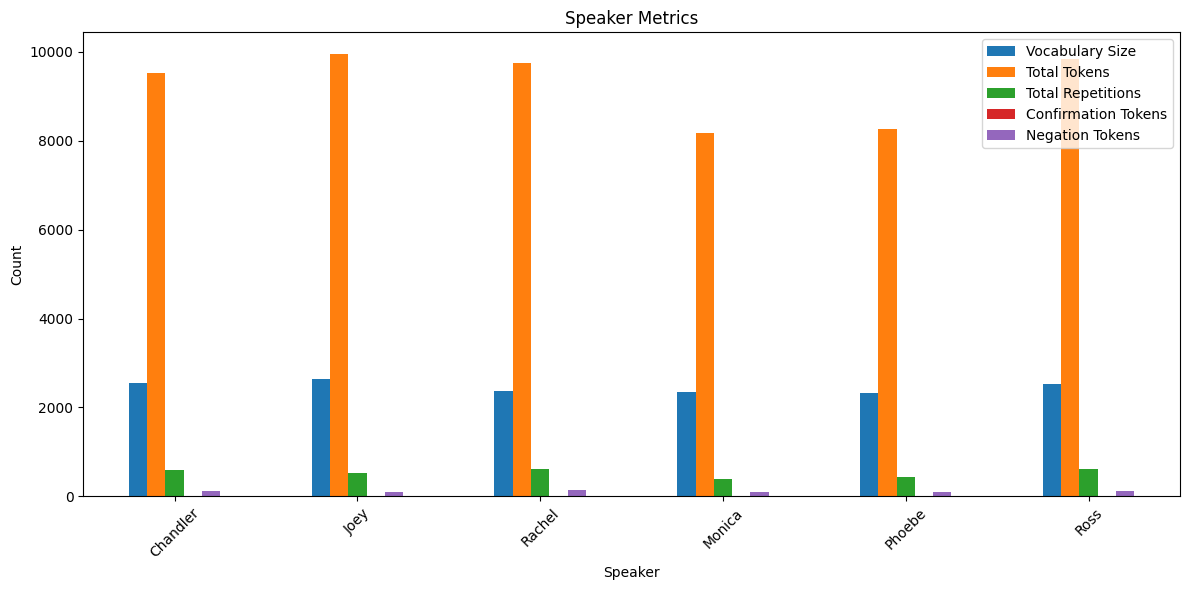

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re


def calculate_row_metrics(speaker_df):
    token_sizes = []
    repetitions = []
    confirmation_counts = []
    negation_counts = []

    confirmation_words = {'yes', 'okay', 'sure', 'absolutely', 'definitely'}
    negation_words = {'no', 'not', 'never', 'none'}

    for _, row in speaker_df.iterrows():
        utterance = row['Utterance_1']
        if pd.isna(utterance):
            token_sizes.append(0)
            repetitions.append(0)
            confirmation_counts.append(0)
            negation_counts.append(0)
            continue

        tokens = utterance.split()
        token_size = len(tokens)
        token_sizes.append(token_size)

        word_counts = Counter(tokens)
        repetition_count = sum(count - 1 for count in word_counts.values() if count > 1)
        repetitions.append(repetition_count)

        confirmation_count = sum(tokens.count(word) for word in confirmation_words)
        confirmation_counts.append(confirmation_count)

        negation_count = sum(tokens.count(word) for word in negation_words)
        negation_counts.append(negation_count)

    speaker_df['Token Size'] = token_sizes
    speaker_df['Repetitions'] = repetitions
    speaker_df['Confirmation Count'] = confirmation_counts
    speaker_df['Negation Count'] = negation_counts

    return speaker_df


def calculate_metrics(speaker_df):
    metrics = {}

    all_utterances = speaker_df['Utterance_1'].fillna('').values
    tokens = ' '.join(all_utterances).split()
    total_tokens = len(tokens)
    
    vocabulary_set = set(tokens)
    vocabulary_size = len(vocabulary_set)
    
    total_repetitions = 0
    for utterance in all_utterances:
        utterance_tokens = utterance.split()
        word_counts = Counter(utterance_tokens)
        total_repetitions += sum(count - 1 for count in word_counts.values() if count > 1)

    
    confirmation_words = {'yes', 'yeah', 'yep', 'okay', 'alright', 'sure', 'absolutely', 'certainly', 'of course', 'indeed', 'definitely'}
    negation_words = {'no', 'not', 'never', 'none', 'nor', 'nobody', 'neither', "don't", "isn't", "wasn't", "weren't", "doesn't", "won't", "haven't"}
    
    confirmation_count = sum(tokens.count(word) for word in confirmation_words)
    negation_count = sum(tokens.count(word) for word in negation_words)
    
    metrics['Vocabulary Size'] = vocabulary_size
    metrics['Total Tokens'] = total_tokens
    metrics['Total Repetitions'] = total_repetitions
    metrics['Confirmation Tokens'] = confirmation_count
    metrics['Negation Tokens'] = negation_count
    
    return metrics

def calculate_average_personality(speaker_df):
    personality_columns = ['Personality']
    averages = {trait: eval(speaker_df[trait].iloc[0]) for trait in personality_columns}
    return averages



df = pd.read_csv('Dyadic_PELD.tsv', sep='\t', header=0)
speakers = df['Speaker_1'].unique()
speaker_dfs = {speaker: df[df['Speaker_1'] == speaker] for speaker in speakers}

for speaker, speaker_df in speaker_dfs.items():
        speaker_df = calculate_row_metrics(speaker_df)

all_metrics = {}
all_personality_averages = {}

for speaker, speaker_df in speaker_dfs.items():
    metrics = calculate_metrics(speaker_df)
    all_metrics[speaker] = metrics
    
    personality_avg = calculate_average_personality(speaker_df)
    all_personality_averages[speaker] = personality_avg

for sp in all_metrics:
    print(f"{sp} ----> \t {all_metrics[sp]}")

for sp in all_personality_averages:
    print(f"{sp} ----> \t {all_personality_averages[sp]}")


df_metrics = pd.DataFrame(all_metrics).T
df_metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Speaker Metrics')
plt.ylabel('Count')
plt.xlabel('Speaker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
speaker_dfs['Chandler']

,Speaker_1,Speaker_2,Personality,Utterance_1,Utterance_2,Utterance_3,Emotion_1,Emotion_2,Emotion_3,Sentiment_1,Sentiment_2,Sentiment_3,Token Size,Repetitions,Confirmation Count,Negation Count
0,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",also I was the point person on my company s tr...,You must ve had your hands full.,That I did. That I did.,neutral,neutral,neutral,neutral,neutral,neutral,17,1,0,0
1,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",That I did. That I did.,So let s talk a little bit about your duties.,My duties? All right.,neutral,neutral,surprise,neutral,neutral,positive,6,3,0,0
2,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",My duties? All right.,"Now you ll be heading a whole division, so you...",I see.,surprise,neutral,neutral,positive,neutral,neutral,4,0,0,0
3,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",I see.,But there ll be perhaps 30 people under you so...,Good to know.,neutral,neutral,neutral,neutral,neutral,neutral,2,0,0,0
4,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",Good to know.,We can go into detail,No don t I beg of you!,neutral,neutral,fear,neutral,neutral,negative,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,Chandler,Joey,"[0.648, 0.375, 0.386, 0.58, 0.477]","You don't turn and slide, you throw it out! I'...","Look, we're not throwing it out! I built this ...","All right, how about we, how 'bout we sell it.",anger,anger,neutral,negative,negative,neutral,23,1,0,0
6451,Chandler,Joey,"[0.648, 0.375, 0.386, 0.58, 0.477]","All right, how about we, how 'bout we sell it.","All right. But, you're gonna have to tell them.",Do you mind if we stick you in another cabinet...,neutral,sadness,neutral,neutral,negative,neutral,10,1,0,0
6474,Chandler,Tony,"[0.648, 0.375, 0.386, 0.58, 0.477]","You'll have to pardon my roommate, he wanted t...","We don't have 50 bucks, but would you be willi...","Y'know, I, I really don't think we need a canoe.",neutral,neutral,sadness,neutral,neutral,negative,11,1,0,0
6475,Chandler,Tony,"[0.648, 0.375, 0.386, 0.58, 0.477]","Y'know, I, I really don't think we need a canoe.",You gotta take the canoe!,"All right, just, just take the entertainment c...",sadness,neutral,neutral,negative,neutral,neutral,10,0,0,0


Chandler


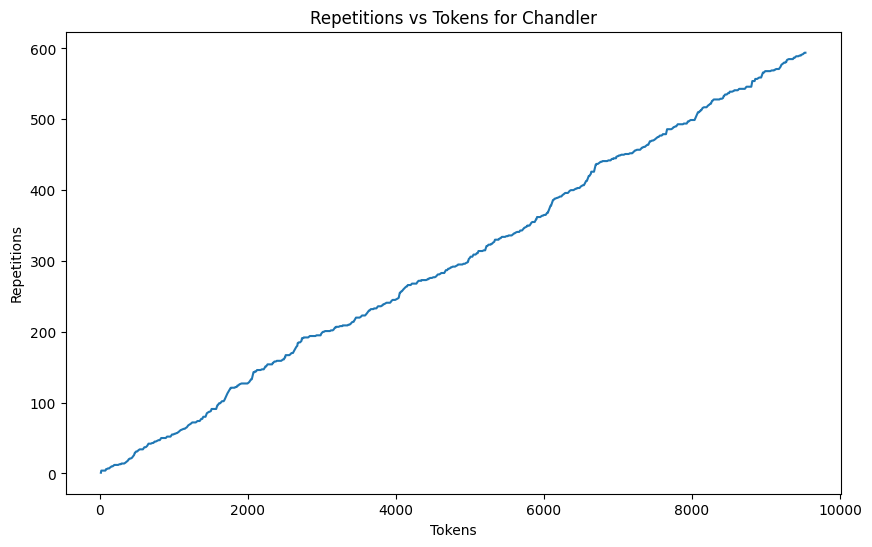

Joey


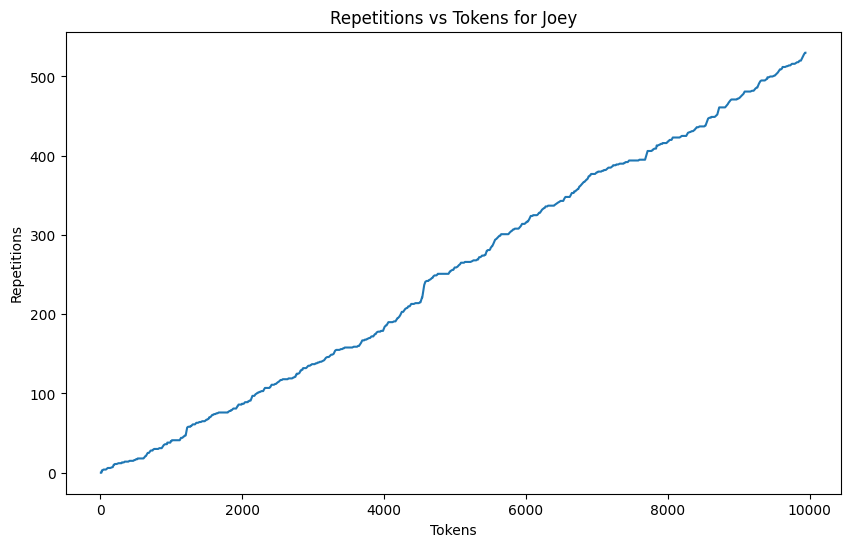

Rachel


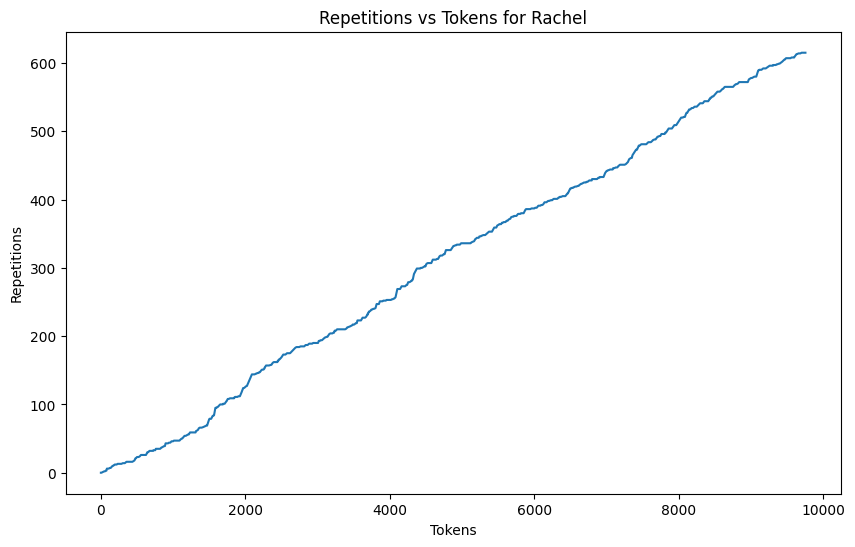

Monica


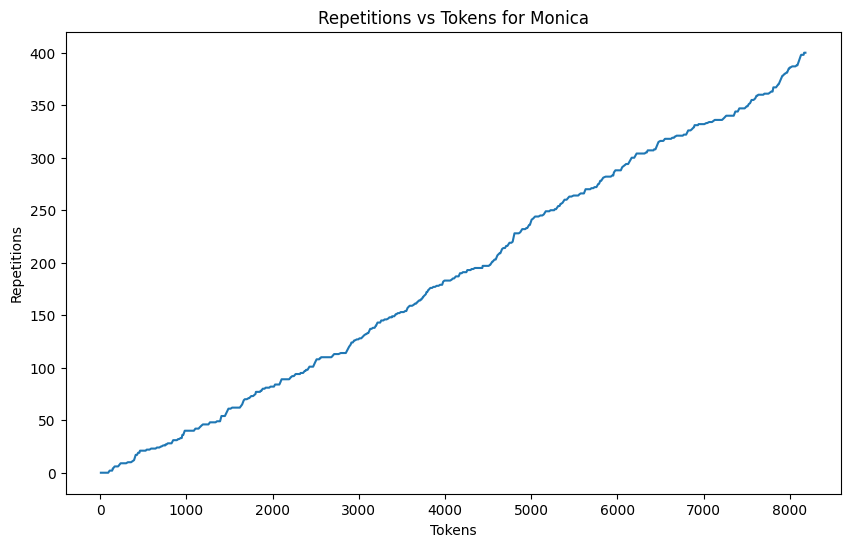

Phoebe


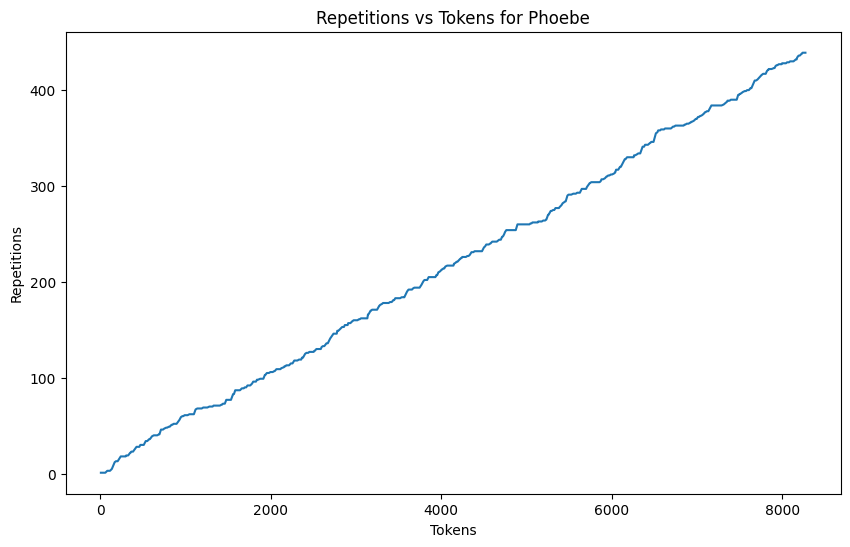

Ross


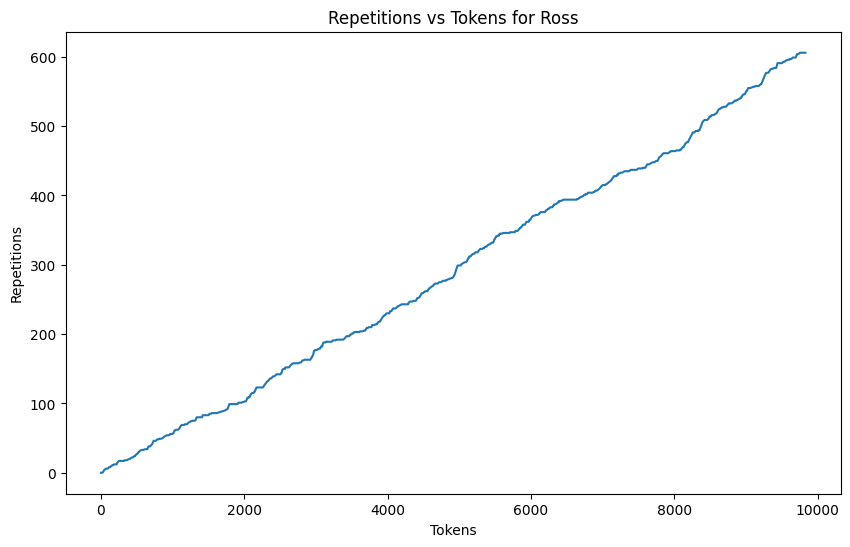

In [30]:
import matplotlib.pyplot as plt

for speaker, speaker_df in speaker_dfs.items():
    print(speaker)
    tokens = []
    reps = []
    for index, row in speaker_df.iterrows():
        if not tokens:  # Check if tokens list is empty
            tokens.append(row['Token Size'])
            reps.append(1) if 'Repetitions' not in row else reps.append(row['Repetitions'])
        else:
            tokens.append(tokens[-1] + row['Token Size'])
            reps.append(reps[-1] + 1) if 'Repetitions' not in row else reps.append(reps[-1] + row['Repetitions'])

    plt.figure(figsize=(10,6))
    plt.plot(tokens, reps)
    plt.title(f'Repetitions vs Tokens for {speaker}')
    plt.xlabel('Tokens')
    plt.ylabel('Repetitions')
    plt.show()
